In [ ]:
print('ACIT 4610, Portfolio-2024')
print('\nGroup-13')
print('\nparticipate: Thomas, M khan, Harith')

In [2]:
print('Tools and Libraries:')
print('\n1- Python 3.')
print('\n2- OpenAI Gym for the environment.')
print('\n3- Deep to use Genetic Programming, implement an evolutionary algorithms.')
print('\n4- NumPy for numerical computations.')
print('\n5- pandas for data manipulation and analysis.')
print('\n6- requests for the process of sending and receiving data from websites.')
print('\n7- Matplotlib for plotting results.')
print('\n8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.')
print('\n9- pymoo for for multi-objective optimization algorithms.')
print('\n10-Keras for the convenience of mathematical calculations')

!pip3 freeze
!pip3 install gym numpy tensorflow keras openAi matplotlib requests pandas gym deap pymoo

import sys
print('System version',sys.version)

Tools and Libraries:

1- Python 3.

2- OpenAI Gym for the environment.

3- Deep to use Genetic Programming, implement an evolutionary algorithms.

4- NumPy for numerical computations.

5- pandas for data manipulation and analysis.

6- requests for the process of sending and receiving data from websites.

7- Matplotlib for plotting results.

8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.

9- pymoo for for multi-objective optimization algorithms.

10-Keras for the convenience of mathematical calculations
about-time==4.2.1
alive-progress==3.1.5
asttokens==2.4.1
autograd==1.7.0
beautifulsoup4==4.12.3
certifi==2024.8.30
charset-normalizer==3.4.0
cloudpickle==3.1.0
cma==3.2.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
deap==1.4.1
debugpy==1.8.7
decorator==5.1.1
Deprecated==1.2.14
dill==0.3.9
executing==2.1.0
Farama-Notifications==0.0.4
fonttools==4.54.1
frozendict==2.4.6
grapheme==0.6.0
gymnasium==1.0.0
html5lib==1.1
idna==3.10
ipykernel==6.29.5
ipython==8.2

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


Problem 3: Solving the Vehicle Routing Problem with Time Windows (VRPTW) Using 
Ant Colony Optimization (ACO) and Particle Swarm Optimization (PSO)

Overview 
This exercise focuses on optimizing the delivery routes for a fleet of vehicles using two nature
inspired optimization algorithms: Ant Colony Optimization (ACO) and Particle Swarm 
Optimization (PSO). The objective is to find the most efficient routes for a set of vehicles, 
ensuring that all customers receive their deliveries within specified time windows. You will 
implement both ACO and PSO to solve the Vehicle Routing Problem with Time Windows 
(VRPTW) and compare the effectiveness of these algorithms. 

Problem Description 
The VRPTW is a variant of the Vehicle Routing Problem (VRP), which is crucial in logistics, 
transportation, and supply chain management. In VRPTW, a fleet of vehicles must deliver 
goods to multiple customers. Each customer has a specific time window during which the 
delivery must occur. The challenge is to design routes that minimize the total travel distance 
while ensuring all deliveries meet their respective time constraints.

The primary objective of the VRPTW is to minimize the total distance travelled by all vehicles 
while ensuring that: 
1. Each customer is visited exactly once by one vehicle. 
2. Deliveries occur within the specified time windows. 
3. The total demand on any route does not exceed the vehicle's capacity. 

Key Components 
• Depot: The starting and ending point for all vehicles. 
• Customers: Each customer has a location, a demand for goods, a time window for 
receiving the delivery, and a service time. 
• Vehicles: Each vehicle has a limited capacity and must return to the depot after 
completing its route. 

Detailed Instructions

1. Problem Formulation: 
* Define the VRPTW for the chosen dataset, ensuring clear identification of 
constraints (e.g., time windows, vehicle capacity). 
* Formulate the objective function that minimizes total travel distance while 
penalizing violations of time windows. 

To Define the VRPTW for this problem, we need to define several key aspects:
1. Routes.
2. City_coordinates
3. Time Windows: Each city has a specific time window during which it must be visited.
4. violations (time window and capacity)
5. Dist matrix
6. Vehicle Capacity: Each vehicle can carry a limited amount of load.
7. Addition variable, num_ants, num_iterations, alpha, beta, rho, Q.

1. To defince the Routes, we need to ipmort the dataset. In this case we using dataset named c101.txt from https://www.sintef.no/projectweb/top/vrptw/100-customers/


In [555]:
# 1. Dataset, and Preprocessing
# Thr source is ttps://www.sintef.no/projectweb/top/vrptw/100-customers/

# Read Text Files with Pandas using read_table()
import re

# Path to the file containing the dataset
file_path = 'c101.txt'

# Function to read the file and parse the routes
def parse_routes_from_file(file_path):
    with open(file_path, 'r') as file:
        # Read the content of the file
        dataset = file.read()

    # Regular expression pattern to match the routes
    route_pattern = re.compile(r"Route\s+(\d+)\s*:\s*([0-9\s]+)")

    # Find all routes using the regex pattern
    routes = {}

    matches = route_pattern.findall(dataset)

    # Process the matches to store routes as integers in a dictionary
    for match in matches:
        route_number = int(match[0])
        route_values = list(map(int, match[1].split()))
        routes[route_number] = route_values

    return routes

# Call the function and get the routes
routes = parse_routes_from_file(file_path)

# Print the parsed routes
for route_number, route in routes.items():
    print(f"Route {route_number}: {route}")

Route 1: [81, 78, 76, 71, 70, 73, 77, 79, 80]
Route 2: [57, 55, 54, 53, 56, 58, 60, 59]
Route 3: [98, 96, 95, 94, 92, 93, 97, 100, 99]
Route 4: [32, 33, 31, 35, 37, 38, 39, 36, 34]
Route 5: [13, 17, 18, 19, 15, 16, 14, 12]
Route 6: [90, 87, 86, 83, 82, 84, 85, 88, 89, 91]
Route 7: [43, 42, 41, 40, 44, 46, 45, 48, 51, 50, 52, 49, 47]
Route 8: [67, 65, 63, 62, 74, 72, 61, 64, 68, 66, 69]
Route 9: [5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 75]
Route 10: [20, 24, 25, 27, 29, 30, 28, 26, 23, 22, 21]


In [542]:
print("Routes dictionary for the cities", routes)

Routes dictionary for the cities {1: [81, 78, 76, 71, 70, 73, 77, 79, 80], 2: [57, 55, 54, 53, 56, 58, 60, 59], 3: [98, 96, 95, 94, 92, 93, 97, 100, 99], 4: [32, 33, 31, 35, 37, 38, 39, 36, 34], 5: [13, 17, 18, 19, 15, 16, 14, 12], 6: [90, 87, 86, 83, 82, 84, 85, 88, 89, 91], 7: [43, 42, 41, 40, 44, 46, 45, 48, 51, 50, 52, 49, 47], 8: [67, 65, 63, 62, 74, 72, 61, 64, 68, 66, 69], 9: [5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 75], 10: [20, 24, 25, 27, 29, 30, 28, 26, 23, 22, 21]}


2. City_coordinates

In [557]:
import random
def city_coordinates(route_data):
    coordinates = {}
    
    for city in route_data:
        # Generate random coordinates
        lat = random.uniform(30, 40)  # Random latitude between 30 and 40
        lon = random.uniform(-120, -110)  # Random longitude between -120 and -110
        coordinates[city] = (lat, lon)    
    return coordinates

city_coordinates = city_coordinates(routes)

print("The city coordinates is : ", city_coordinates)  

The city coordinates is :  {1: (34.7424622727068, -116.50926760433387), 2: (36.35431492662929, -117.34934088922775), 3: (34.72014480256434, -111.4903059581835), 4: (39.82971223237418, -118.65055069596532), 5: (39.9554467799436, -113.72403253804181), 6: (31.668410701193377, -118.29269044282287), 7: (32.371609507560095, -117.24450400134154), 8: (39.73613519061599, -112.11649164465808), 9: (33.056971622995654, -118.80918168553356), 10: (31.48720414478032, -114.75919877871254)}


In [511]:
print(city_coordinates)

{1: (35.20444501574367, -116.58412052776522), 2: (37.56691388593872, -114.26136351023268), 3: (31.786125173490074, -117.63682915324075), 4: (36.973046760476905, -112.37037075914422), 5: (39.22824261084125, -116.0951146130541), 6: (36.9052902104838, -112.45977255739237), 7: (31.826224303010523, -116.1664586467753), 8: (32.5582662208541, -111.74601532650445), 9: (32.489679135605186, -113.87689726310907), 10: (31.997527169169548, -118.34856840493006)}


3. Time Windows: Each city has a specific time window during which it must be visited.

In [569]:
# Assume each "jump" between locations takes 1 minute
time_per_location = 1  # in minutes

def calculate_time_window(route):
    # The time window is simply the time taken from the first to the last location in the route.
    # Since the number of locations - 1 gives us the number of transitions, we multiply by time_per_location.
    num_locations = len(route)
    total_time = (num_locations - 1) * time_per_location  # Total time in minutes
    return total_time

# Calculate and print the time window for each route
time_windows = {}
for route_id, locations in routes.items():
    time_window = calculate_time_window(locations)
    time_windows[route_id] = time_window

# Display the time windows for all routes
for route_id, time_window in time_windows.items():
    print(f"Route {route_id}: Time window = {time_window} minutes")


Route 1: Time window = 8 minutes
Route 2: Time window = 7 minutes
Route 3: Time window = 8 minutes
Route 4: Time window = 8 minutes
Route 5: Time window = 7 minutes
Route 6: Time window = 9 minutes
Route 7: Time window = 12 minutes
Route 8: Time window = 10 minutes
Route 9: Time window = 11 minutes
Route 10: Time window = 10 minutes


In [571]:
time_windows = [
    (0, 8),   # Route 1
    (0, 7),   # Route 2
    (0, 8),   # Route 3
    (0, 8),   # Route 4
    (0, 7),   # Route 5
    (0, 9),   # Route 6
    (0, 12),  # Route 7
    (0, 10),  # Route 8
    (0, 11),  # Route 9
    (0, 10),  # Route 10
]

In [574]:
print(time_windows)

[(0, 8), (0, 7), (0, 8), (0, 8), (0, 7), (0, 9), (0, 12), (0, 10), (0, 11), (0, 10)]


Analyse the routes, Time Windows, and city time windows

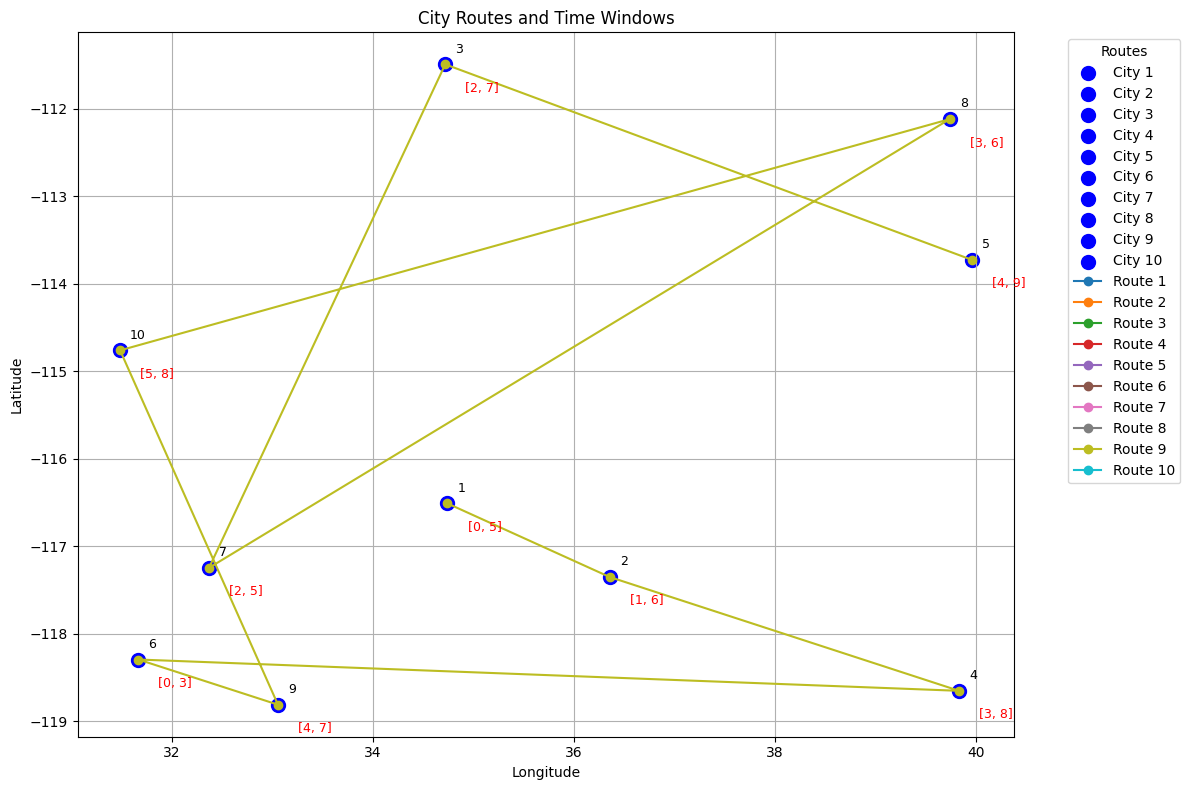

In [575]:
import matplotlib.pyplot as plt

# Plotting the city coordinates, routes, and time windows
plt.figure(figsize=(12, 8))

# Plot the cities as points
for city, (x, y) in city_coordinates.items():
    plt.scatter(x, y, color='blue', s=100, label=f"City {city}")  # Cities as blue points

# Plot the routes
for route_id, cities in routes.items():
    route_coords = [city_coordinates[city] for city in cities if city in city_coordinates]  # Get coordinates for cities in route
    route_x = [coord[0] for coord in route_coords]  # Extract x-coordinates
    route_y = [coord[1] for coord in route_coords]  # Extract y-coordinates
    plt.plot(route_x, route_y, marker='o', label=f'Route {route_id}')  # Plot the route with markers

# Annotating the cities with their IDs
for city, (x, y) in city_coordinates.items():
    plt.text(x + 0.1, y + 0.1, f'{city}', fontsize=9, ha='left', va='bottom')

# Adding time window annotations for each city
for city, (start_time, end_time) in city_time_windows.items():
    x, y = city_coordinates[city]
    plt.text(x + 0.2, y - 0.2, f'[{start_time}, {end_time}]', fontsize=9, ha='left', va='top', color='red')

# Labels and title
plt.title('City Routes and Time Windows')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show legend for routes and cities
plt.legend(title='Routes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()



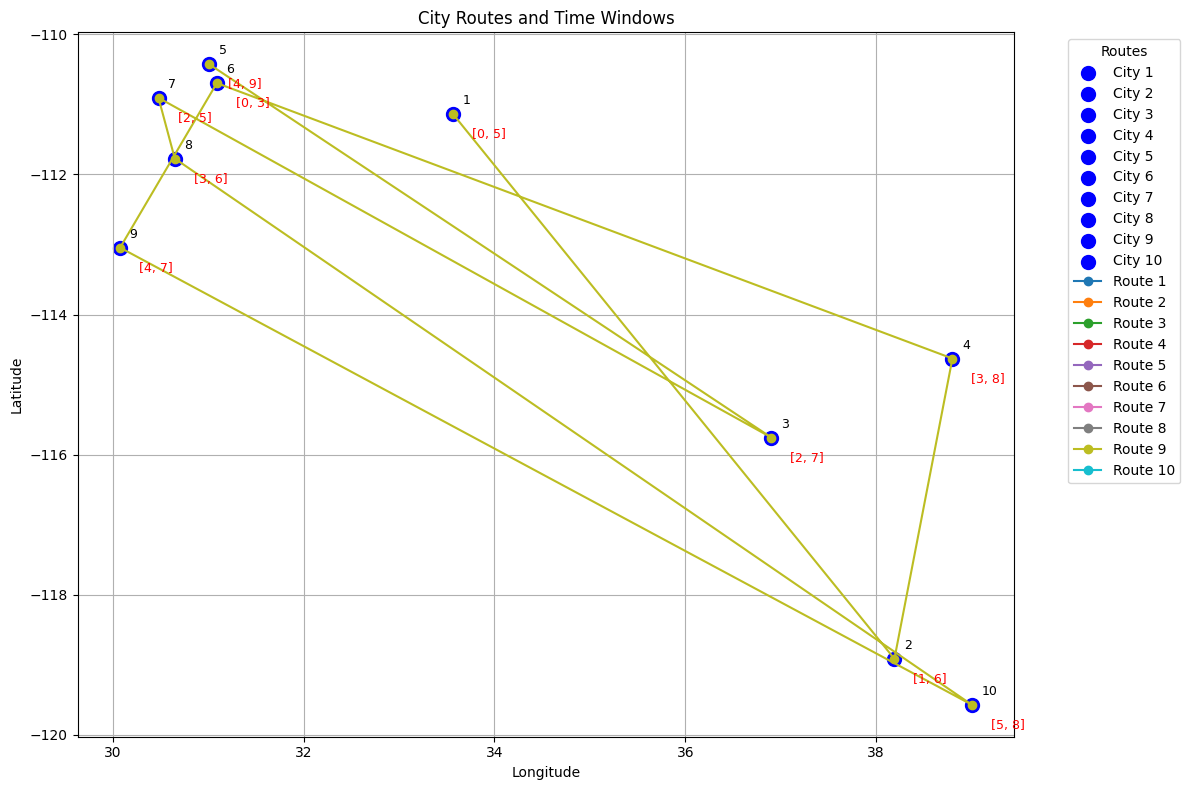

In [576]:
import matplotlib.pyplot as plt

# City coordinates
city_coordinates = {
    1: (33.56403350042803, -111.13563633914366),
    2: (38.192379125118705, -118.91825779039407),
    3: (36.90189096028197, -115.75690476554594),
    4: (38.800334600777155, -114.62865161390198),
    5: (31.010881209840807, -110.426836367725),
    6: (31.089481875618542, -110.69434250594122),
    7: (30.477871521750295, -110.9047216450551),
    8: (30.648658064463987, -111.77255081736457),
    9: (30.075416202010356, -113.04502143426738),
    10: (39.00276321347439, -119.57346757081098)
}

time_windows = [
    (0, 8),   # Route 1
    (0, 7),   # Route 2
    (0, 8),   # Route 3
    (0, 8),   # Route 4
    (0, 7),   # Route 5
    (0, 9),   # Route 6
    (0, 12),  # Route 7
    (0, 10),  # Route 8
    (0, 11),  # Route 9
    (0, 10),  # Route 10
]

# New routes dictionary
routes = {
    1: [81, 78, 76, 71, 70, 73, 77, 79, 80],
    2: [57, 55, 54, 53, 56, 58, 60, 59],
    3: [98, 96, 95, 94, 92, 93, 97, 100, 99],
    4: [32, 33, 31, 35, 37, 38, 39, 36, 34],
    5: [13, 17, 18, 19, 15, 16, 14, 12],
    6: [90, 87, 86, 83, 82, 84, 85, 88, 89, 91],
    7: [43, 42, 41, 40, 44, 46, 45, 48, 51, 50, 52, 49, 47],
    8: [67, 65, 63, 62, 74, 72, 61, 64, 68, 66, 69],
    9: [5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 75],
    10: [20, 24, 25, 27, 29, 30, 28, 26, 23, 22, 21]
}

# Plotting the city coordinates, routes, and time windows
plt.figure(figsize=(12, 8))

# Plot the cities as points
for city, (x, y) in city_coordinates.items():
    plt.scatter(x, y, color='blue', s=100, label=f"City {city}")  # Cities as blue points

# Plot the routes
for route_id, cities in routes.items():
    route_coords = [city_coordinates[city] for city in cities if city in city_coordinates]  # Get coordinates for cities in route
    route_x = [coord[0] for coord in route_coords]  # Extract x-coordinates
    route_y = [coord[1] for coord in route_coords]  # Extract y-coordinates
    plt.plot(route_x, route_y, marker='o', label=f'Route {route_id}')  # Plot the route with markers

# Annotating the cities with their IDs
for city, (x, y) in city_coordinates.items():
    plt.text(x + 0.1, y + 0.1, f'{city}', fontsize=9, ha='left', va='bottom')

# Adding time window annotations for each city
for city, (start_time, end_time) in city_time_windows.items():
    x, y = city_coordinates[city]
    plt.text(x + 0.2, y - 0.2, f'[{start_time}, {end_time}]', fontsize=9, ha='left', va='top', color='red')

# Labels and title
plt.title('City Routes and Time Windows')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show legend for routes and cities
plt.legend(title='Routes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()



4. violations (time window and capacity)

5. Dist matrix

In [578]:
import math

def calculate_dist_matrix(city_coordinates):
    """
    Given a dictionary of city coordinates, this function calculates the Euclidean distance matrix
    for these cities.

    Args:
    - city_coordinates (dict): A dictionary where keys are city ids, and values are tuples of (latitude, longitude).

    Returns:
    - dist_matrix (list of lists): A 2D list (matrix) where dist_matrix[i][j] is the Euclidean distance between city i and city j.
    """
    # Convert city_coordinates dict to a list of tuples
    city_list = list(city_coordinates.values())
    num_cities = len(city_list)
    
    # Initialize distance matrix with zero values
    dist_matrix = [[0 for _ in range(num_cities)] for _ in range(num_cities)]
    
    # Calculate Euclidean distance between each pair of cities
    for i in range(num_cities):
        for j in range(i + 1, num_cities):  # Use symmetry to avoid duplicate calculations
            lat1, lon1 = city_list[i]
            lat2, lon2 = city_list[j]
            
            # Calculate the Euclidean distance (simplified as straight-line distance on the surface)
            distance = math.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2)
            dist_matrix[i][j] = distance
            dist_matrix[j][i] = distance  # Symmetric matrix

    return dist_matrix

# Calculate the distance matrix
dist_matrix = calculate_dist_matrix(city_coordinates)

# Output the distance matrix
for row in dist_matrix:
    print(row)


[0, 9.05487602759178, 5.700650339317891, 6.294442383818633, 2.649713950299896, 2.513592248370802, 3.0947887415108153, 2.9841370587139533, 3.9769589005042127, 10.03876370803067]
[9.05487602759178, 0, 3.4146028541105746, 4.332474005667217, 11.121067848210616, 10.866643085277719, 11.123416251992147, 10.39080630102245, 10.018981604436844, 1.0421239019493063]
[5.700650339317891, 3.4146028541105746, 0, 2.208402913947351, 7.9444084112816284, 7.708024130725846, 8.050571829467081, 7.4147149664520855, 7.345411413105868, 4.356583049910368]
[6.294442383818633, 4.332474005667217, 2.208402913947351, 0, 8.850470919254809, 8.656560396951493, 9.117622832440546, 8.637542596865167, 8.867473462660541, 4.948957687325723]
[2.649713950299896, 11.121067848210616, 7.9444084112816284, 8.850470919254809, 0, 0.2788146313306719, 0.7158726603853609, 1.3936114907015567, 2.7802855651067135, 12.146235644234318]
[2.513592248370802, 10.866643085277719, 7.708024130725846, 8.656560396951493, 0.2788146313306719, 0, 0.64678

In [579]:
def penalty_calculation(city_times, time_windows, penalty_factor=10):
    penalty = 0
    for i, arrival_time in enumerate(city_times):
        earliest, latest = time_windows[i]
        if arrival_time < earliest:
            penalty += penalty_factor * (earliest - arrival_time)  # Penalty for arriving too early
        elif arrival_time > latest:
            penalty += penalty_factor * (arrival_time - latest)  # Penalty for arriving too late
    return penalty


In [562]:
# Calculate the distance matrix
dist_matrix = calculate_dist_matrix(city_coordinates)

In [580]:
print(dist_matrix)

[[0, 9.05487602759178, 5.700650339317891, 6.294442383818633, 2.649713950299896, 2.513592248370802, 3.0947887415108153, 2.9841370587139533, 3.9769589005042127, 10.03876370803067], [9.05487602759178, 0, 3.4146028541105746, 4.332474005667217, 11.121067848210616, 10.866643085277719, 11.123416251992147, 10.39080630102245, 10.018981604436844, 1.0421239019493063], [5.700650339317891, 3.4146028541105746, 0, 2.208402913947351, 7.9444084112816284, 7.708024130725846, 8.050571829467081, 7.4147149664520855, 7.345411413105868, 4.356583049910368], [6.294442383818633, 4.332474005667217, 2.208402913947351, 0, 8.850470919254809, 8.656560396951493, 9.117622832440546, 8.637542596865167, 8.867473462660541, 4.948957687325723], [2.649713950299896, 11.121067848210616, 7.9444084112816284, 8.850470919254809, 0, 0.2788146313306719, 0.7158726603853609, 1.3936114907015567, 2.7802855651067135, 12.146235644234318], [2.513592248370802, 10.866643085277719, 7.708024130725846, 8.656560396951493, 0.2788146313306719, 0, 0

6. Vehicle Capacity: Each vehicle can carry a limited amount of load.

In [581]:
vehicle_capacity= 10

7. num_ants=20, num_iterations=100, alpha=1.0, beta=2.0, rho=0.1, Q=100

In [582]:
# ACO Parameters
num_ants = 20           # Number of ants
num_iterations = 50    # Number of iterations
alpha = 1.0             # Influence of pheromone
beta = 2.0              # Influence of distance
rho = 0.1               # Pheromone evaporation rate
Q = 100                 # Total pheromone deposited by each ant


# PSO hyperparameters
num_particles = 20
num_iterations = 50
w=0.5, 
c1=1.5, 
c2=1.5

2. Algorithm Implementation:

To handle time windows efficiently, we need a function to calculate a penalty based on early or late arrivals.
1. Penalty Mechanism: If a vehicle arrives too early
2. Handling Early Arrival: If a vehicle arrives before the allowed time window
3. Handling Late Arrival: If a vehicle arrives after the time window


Updated Code with Penalty Calculation for Early or Late Arrivals

Approach:
1. Early Arrival: If the ant arrives before the city's start time, the ant has to wait. This does not incur a penalty, but we can track the waiting time if necessary.

Late Arrival: If the ant arrives after the city's end time, a penalty is applied. We will add a penalty based on how late the ant is, which could be a linear penalty proportional to the violation (e.g., 1 unit of penalty for each unit of time the ant is late).

A. Implement ACO Algorithm for defined VRPTW, with Penalty Calculation for Early or Late Arrivals

In [ ]:
import time
class ACO:
    def __init__(self, num_ants, dist_matrix, time_windows, alpha=1.0, beta=2.0, rho=0.1, Q=100, penalty_factor=10):
        self.num_ants = num_ants
        self.dist_matrix = dist_matrix
        self.time_windows = time_windows
        self.num_cities = len(time_windows)  # Deriving number of cities from time windows
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        self.penalty_factor = penalty_factor
        self.pheromones = [[1.0 for _ in range(self.num_cities)] for _ in range(self.num_cities)]
        self.best_global_position = None
        self.best_global_value = float('inf')
        self.violations_over_time = []  # Track violations over time (list of lists)
        self.total_distances = []  # Track total distances over time
        self.best_values = []  # Track the best fitness value over iterations

    def fitness(self, position):
        total_travel_time = 0
        city_times = [0] * self.num_cities  # To store arrival times at each city
        current_time = 0
        for i in range(self.num_cities - 1):
            city_from = position[i]
            city_to = position[i + 1]
            total_travel_time += self.dist_matrix[city_from][city_to]
            current_time += self.dist_matrix[city_from][city_to]
            city_times[i + 1] = current_time

        penalty = penalty_calculation(city_times, self.time_windows, self.penalty_factor)
        total_value = total_travel_time + penalty
        return total_travel_time, penalty, total_value

    def update_pheromones(self, ants_positions, ants_fitness):
        # Evaporate pheromones
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                self.pheromones[i][j] *= (1 - self.rho)

        # Add pheromones based on fitness (inverse of fitness)
        for i in range(self.num_ants):
            fitness_value = ants_fitness[i]
            for j in range(self.num_cities - 1):
                self.pheromones[ants_positions[i][j]][ants_positions[i][j + 1]] += self.Q / (fitness_value + 1)

    def optimize(self, max_iterations=50):
        start_time = time.time()  # Start timer for convergence time
        for _ in range(max_iterations):
            iteration_distances = []  # Track distances for each iteration
            iteration_violations = []  # Track violations for each iteration
            ants_positions = []
            ants_fitness = []

            for ant in range(self.num_ants):
                # Generate a random solution (ant's path)
                position = random.sample(range(self.num_cities), self.num_cities)
                travel_time, penalty, total_value = self.fitness(position)
                ants_positions.append(position)
                ants_fitness.append(total_value)

                iteration_distances.append(travel_time)
                iteration_violations.append(penalty)

                # Update global best solution
                if total_value < self.best_global_value:
                    self.best_global_value = total_value
                    self.best_global_position = position

            # Store the results at this iteration
            self.total_distances.append(iteration_distances)
            self.violations_over_time.append(iteration_violations)
            self.best_values.append(self.best_global_value)

            # Update pheromones
            self.update_pheromones(ants_positions, ants_fitness)

        self.convergence_time = time.time() - start_time  # End timer
        return self.best_global_position, self.best_global_value, self.violations_over_time, self.total_distances

In [617]:
# Initialize ACO
aco = ACO(num_ants=10, dist_matrix=dist_matrix, time_windows=time_windows)

# Run optimization
best_solution, best_distance, best_fitness_values, violations_over_time = aco.optimize(max_iterations=50)

# Print results
print("Best Fitness Value (Total Cost + Penalty):", best_fitness_values[-1])
print("Violations Over Time:")
for i, violation in enumerate(violations_over_time):
    print(f"Iteration {i+1}: Total Violation = {sum(violation)}")

Best Fitness Value (Total Cost + Penalty): [1672.8750801320148, 2701.512152329546, 1379.8255966673485, 3024.338955672232, 1716.7201367239095, 1902.286204499994, 2123.0647825264773, 1047.4083145043514, 1580.4549284496034, 1879.8522197684815]
Violations Over Time:
Iteration 1: Total Violation = 512.4081123387754
Iteration 2: Total Violation = 472.5241221728853
Iteration 3: Total Violation = 521.9781175512968
Iteration 4: Total Violation = 614.1876316862779
Iteration 5: Total Violation = 566.3639375463191
Iteration 6: Total Violation = 573.5085584785961
Iteration 7: Total Violation = 532.3876486455002
Iteration 8: Total Violation = 557.7978730505586
Iteration 9: Total Violation = 554.6289846147628
Iteration 10: Total Violation = 566.2532968589823
Iteration 11: Total Violation = 489.7367456709163
Iteration 12: Total Violation = 538.5321063235898
Iteration 13: Total Violation = 591.089645823794
Iteration 14: Total Violation = 546.0030896216475
Iteration 15: Total Violation = 564.61054173967

In [618]:
# Plotting Functions
def plot_best_solution(best_solution):
    """
    This function will plot the best solution as a route on a 2D plane.
    The route is represented as a list of city indices from best_solution.
    """
    x_coords = [i * 10 for i in range(len(best_solution))]  # Example coordinates, replace with actual city positions
    y_coords = [i * 5 for i in range(len(best_solution))]  # Example coordinates, replace with actual city positions

    best_solution_x = [x_coords[city] for city in best_solution]
    best_solution_y = [y_coords[city] for city in best_solution]

    plt.figure(figsize=(10, 6))
    plt.plot(best_solution_x, best_solution_y, marker='o', linestyle='-', color='b', label="Best Route")
    plt.title("Best Solution (Route) in ACO")
    plt.xlabel("City Index")
    plt.ylabel("City Position (as coordinate value)")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_total_distances(total_distances):
    """
    This function will plot the total distance at each iteration.
    The total distance is computed for each ant in ACO.
    """
    plt.figure(figsize=(10, 6))
    total_dist = [sum(dist) for dist in total_distances]
    plt.plot(total_dist, label='Total Distance (ACO)', color='orange')
    plt.title("Total Distance Over ACO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_penalties(violations):
    """
    This function will plot the penalties (violations) over iterations.
    Penalties are calculated based on the time window violations.
    """
    plt.figure(figsize=(10, 6))
    total_violations = [sum(viol) for viol in violations]
    plt.plot(total_violations, label='Penalties (ACO)', color='red')
    plt.title("Penalties Over ACO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Penalties')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_best_value(best_values):
    """
    This function will plot the best fitness value over iterations.
    The best value corresponds to the solution's quality (total cost + penalty).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(best_values, label='Best Value (Fitness)', color='green')
    plt.title("Best Fitness Value Over ACO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Fitness Value (Total Cost + Penalty)')
    plt.legend()
    plt.grid(True)
    plt.show()


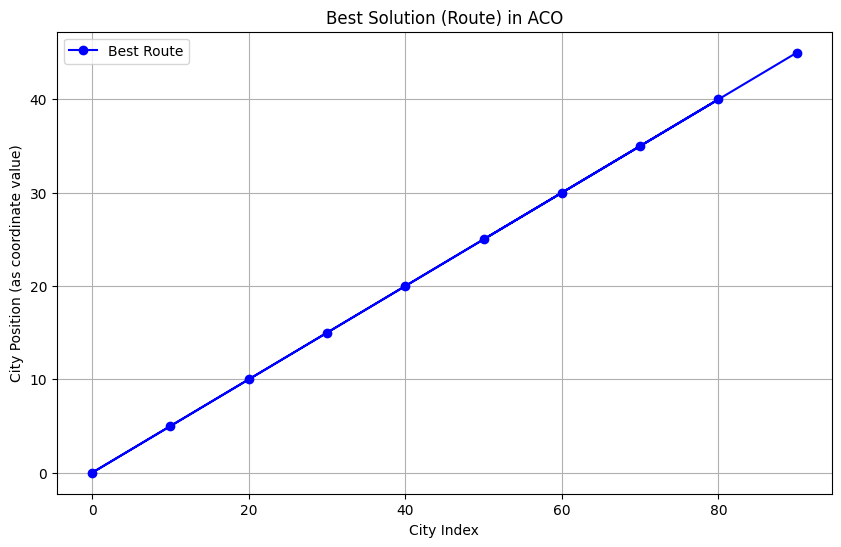

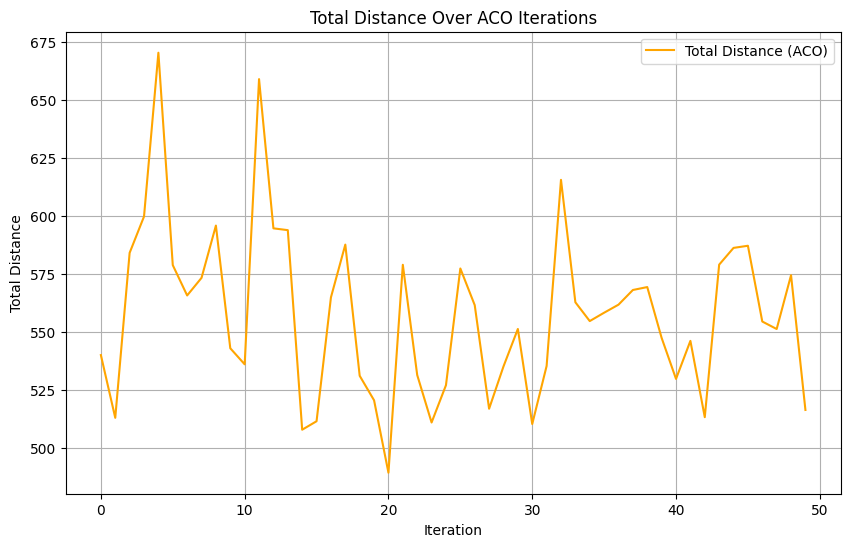

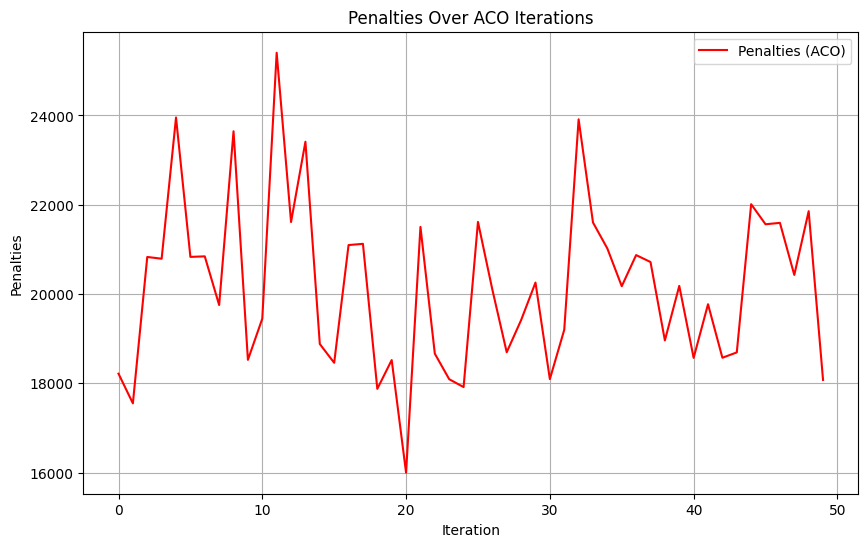

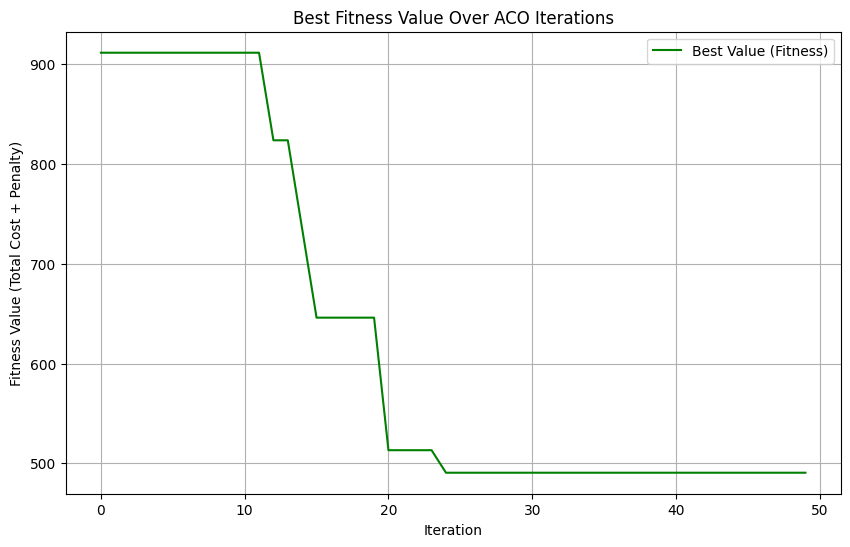

In [619]:
# Initialize ACO
aco = ACO(num_ants=10, dist_matrix=dist_matrix, time_windows=time_windows, alpha=1.0, beta=2.0, rho=0.1, Q=100, penalty_factor=10)

# Run the ACO optimization
best_solution, best_value, violations, total_distances = aco.optimize(max_iterations=50)

# Plot the results
plot_best_solution(best_solution)
plot_total_distances(total_distances)
plot_penalties(violations)
plot_best_value(aco.best_values)

B. Implement PSO Algorithm for defined VRPTW, with Penalty Calculation for Early or Late Arrivals

In [620]:
import random
import math
import matplotlib.pyplot as plt
import time

# 2. PSO Algorithm
class PSO:
    def __init__(self, num_particles, dist_matrix, time_windows, penalty_factor=10, w=0.5, c1=1.5, c2=1.5):
        self.num_particles = num_particles
        self.dist_matrix = dist_matrix
        self.time_windows = time_windows
        self.num_cities = len(time_windows)  # Deriving number of cities from time windows
        self.penalty_factor = penalty_factor
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.particles = [self.create_particle() for _ in range(num_particles)]
        self.best_global_position = None
        self.best_global_value = float('inf')
        self.violations_over_time = []  # Track violations over time
        self.total_distances = []  # Track total distances over time
        self.convergence_time = 0  # Time taken to converge

    def create_particle(self):
        # A particle represents a possible tour (a permutation of cities)
        position = random.sample(range(self.num_cities), self.num_cities)  # Ensure valid city indices
        velocity = [random.uniform(-1, 1) for _ in range(self.num_cities)]
        return {
            'position': position,
            'velocity': velocity,
            'best_position': position,
            'best_value': float('inf')
        }

    def fitness(self, position):
        # Calculate total travel time and arrival times for each city
        total_travel_time = 0
        city_times = [0] * self.num_cities  # To store arrival times at each city
        
        # Starting from city 0
        current_time = 0
        for i in range(self.num_cities - 1):
            city_from = position[i]
            city_to = position[i + 1]
            
            # Ensure that city_from and city_to are within bounds of dist_matrix
            if city_from >= self.num_cities or city_to >= self.num_cities:
                raise ValueError(f"City index out of range: {city_from}, {city_to}")

            total_travel_time += self.dist_matrix[city_from][city_to]
            current_time += self.dist_matrix[city_from][city_to]
            city_times[i + 1] = current_time

        # Compute penalty based on arrival times and time windows
        penalty = penalty_calculation(city_times, self.time_windows, self.penalty_factor)
        return total_travel_time, penalty

    def update_velocity(self, particle):
        for i in range(self.num_cities):
            r1, r2 = random.random(), random.random()
            cognitive_term = self.c1 * r1 * (particle['best_position'][i] - particle['position'][i])
            social_term = self.c2 * r2 * (self.best_global_position[i] - particle['position'][i])
            particle['velocity'][i] = self.w * particle['velocity'][i] + cognitive_term + social_term

    def update_position(self, particle):
        # Generate a new position by swapping cities based on velocity (but keeping it a permutation)
        new_position = particle['position'][:]
        for i in range(self.num_cities):
            if random.random() < abs(particle['velocity'][i]):  # Only update with some probability
                swap_idx = random.randint(0, self.num_cities - 1)
                new_position[i], new_position[swap_idx] = new_position[swap_idx], new_position[i]
        
        particle['position'] = new_position

    def optimize(self, max_iterations=50):
        start_time = time.time()  # Start timer for convergence time
        for _ in range(max_iterations):
            iteration_distances = []  # Track distances for each iteration
            iteration_violations = []  # Track violations for each iteration

            for particle in self.particles:
                travel_time, penalty = self.fitness(particle['position'])
                total_value = travel_time + penalty
                iteration_distances.append(travel_time)
                iteration_violations.append(penalty)

                if total_value < particle['best_value']:
                    particle['best_value'] = total_value
                    particle['best_position'] = particle['position']

                if total_value < self.best_global_value:
                    self.best_global_value = total_value
                    self.best_global_position = particle['position']

            # Store the results at this iteration
            self.total_distances.append(iteration_distances)
            self.violations_over_time.append(iteration_violations)

            # Update particles' velocities and positions
            for particle in self.particles:
                self.update_velocity(particle)
                self.update_position(particle)

        self.convergence_time = time.time() - start_time  # End timer
        # Return best solution, best distance, violations, and total distances
        best_solution = self.best_global_position
        best_distance = sum(self.dist_matrix[best_solution[i]][best_solution[i + 1]] for i in range(self.num_cities - 1))
        return best_solution, best_distance, self.violations_over_time, self.total_distances

In [621]:
def plot_best_solution(best_solution):
    """
    This function will plot the best solution as a route on a 2D plane (using the cities' indices as coordinates).
    The route is represented as a list of city indices from best_solution.
    """
    x_coords = [i for i in range(len(best_solution))]  # Placeholder for x-coordinates (can be city positions)
    y_coords = [best_solution[i] for i in range(len(best_solution))]  # Placeholder for y-coordinates (can be city positions)

    # Plot the best solution
    best_solution_x = [x_coords[city] for city in best_solution]
    best_solution_y = [y_coords[city] for city in best_solution]

    plt.figure(figsize=(10, 6))
    plt.plot(best_solution_x, best_solution_y, marker='o', linestyle='-', color='b', label="Best Route")
    plt.title("Best Solution (Route) in PSO")
    plt.xlabel("City Index")
    plt.ylabel("City Position (as coordinate value)")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_total_distances(total_distances):
    """
    This function will plot the total distance at each iteration.
    The total distance is computed for each particle (or ant) in PSO.
    """
    plt.figure(figsize=(10, 6))
    plt.plot([sum(dist) for dist in total_distances], label='Total Distance (PSO)', color='orange')
    plt.title("Total Distance Over PSO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_penalties(violations):
    """
    This function will plot the penalties (violations) over iterations.
    Penalties are calculated based on the time window violations.
    """
    plt.figure(figsize=(10, 6))
    plt.plot([sum(viol) for viol in violations], label='Penalties (PSO)', color='red')
    plt.title("Penalties Over PSO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Penalties')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_best_value(best_values):
    """
    This function will plot the best value (fitness) over iterations. The best value corresponds to the solution's quality.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(best_values, label='Best Value (Fitness)', color='green')
    plt.title("Best Fitness Value Over PSO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Fitness Value (Total Cost + Penalty)')
    plt.legend()
    plt.grid(True)
    plt.show()

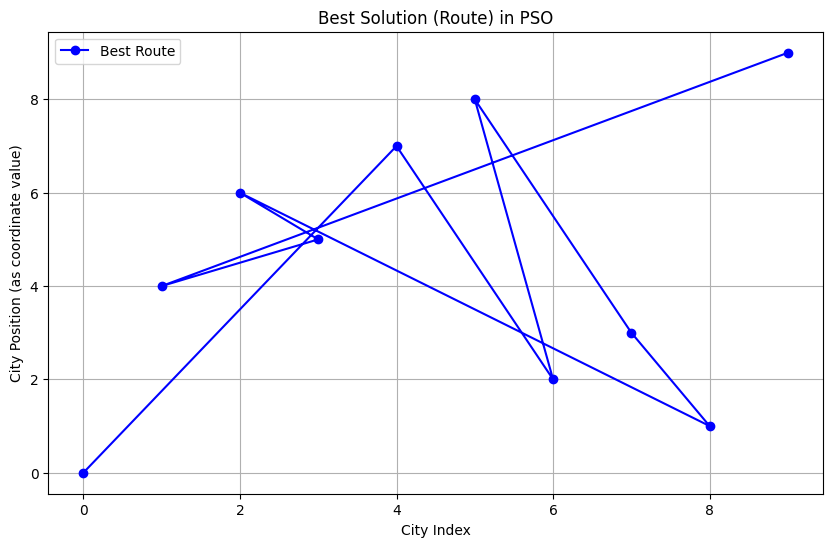

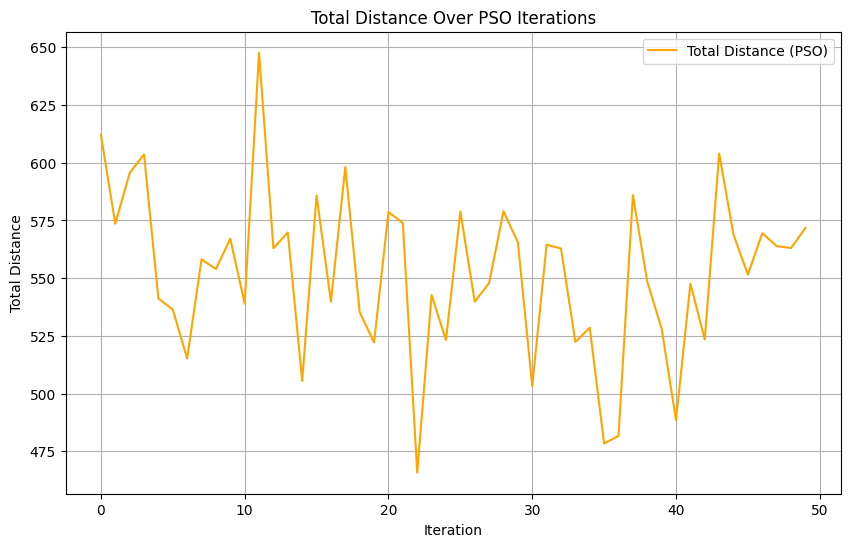

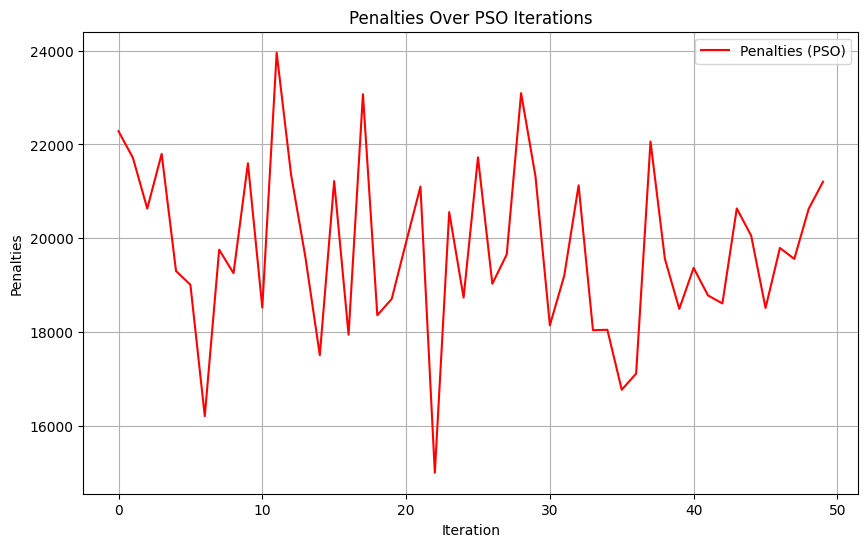

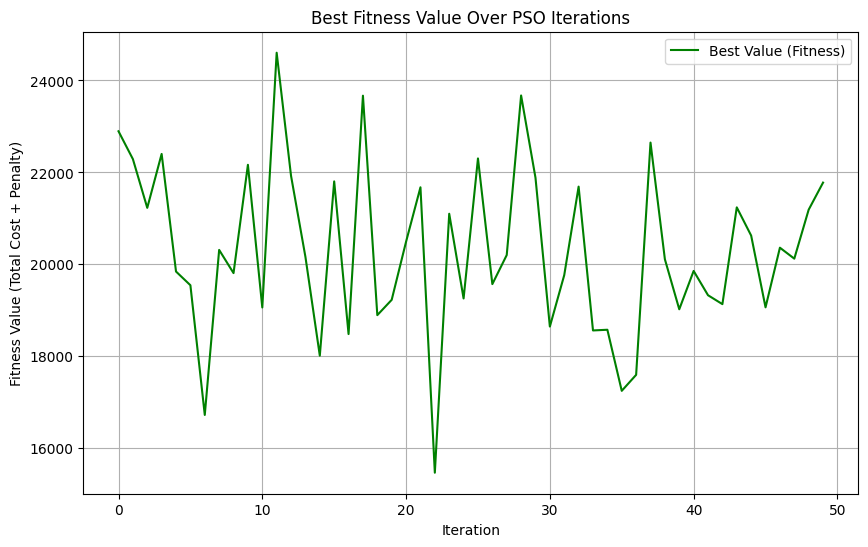

In [629]:
# Initialize PSO
pso = PSO(num_particles=10, dist_matrix=dist_matrix, time_windows=time_windows)

# Run optimization
best_solution, best_distance, violations_over_time, total_distances = pso.optimize(max_iterations=50)

# Plot results
plot_best_solution(best_solution)
plot_total_distances(total_distances)
plot_penalties(violations_over_time)
plot_best_value([sum(dist) + sum(viol) for dist, viol in zip(total_distances, violations_over_time)])